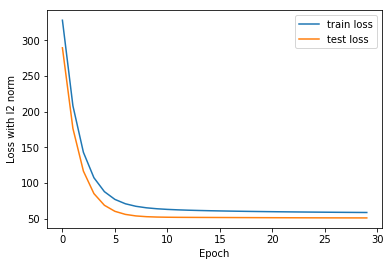

In [1]:
import numpy as np 
import scipy  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def h(w,X):
    return X.dot(w)

def error(w,X,Y):
    return h(w,X) - Y

def L(w,X,Y,lamda = 0.0):
    num_records,num_features  = np.shape(X)  
    e = error(w,X,Y)
    regulation_loss = 1.0/2 * lamda * w.transpose().dot(w)
    loss = 1.0/2 * 1.0/float(num_records) * e.transpose().dot(e)\
        + regulation_loss
    return loss[0][0]

def g(w,X,Y,lamda = 0.0):
    num_records,num_features  = np.shape(X)  
    
    # L2 norm
    return 1.0/num_records * X.transpose().dot(error(w,X,Y)) \
            + lamda * w

data = load_svmlight_file("./Housing.txt")
# add interception
X = scipy.sparse.hstack(\
    (scipy.sparse.csr_matrix(np.ones((len(data[1]),1))),data[0]))
Y = data[1].reshape((len(data[1]),1))

num_records,num_features  = np.shape(X) 

X_train, X_test, Y_train, Y_test = train_test_split(\
X, Y, test_size=0.33,random_state=42)
Y_train = Y_train.reshape((len(Y_train),1))
Y_test = Y_test.reshape((len(Y_test),1))

# initialize w
w = np.random.normal(size=(num_features,1))

lamda = 0.5
eta = 0.05
loss_train = []
loss_test = []
max_iterate = 30
for epoch in range(max_iterate):
    #print("epoch:",epoch)
    loss_train.append(L(w,X_train,Y_train,lamda))
    loss_test.append(L(w,X_test,Y_test,lamda))
    w = w - eta * g(w,X_train,Y_train,lamda)
    
fig, ax = plt.subplots()
train_loss_line = ax.plot(range(max_iterate),loss_train,label='train loss')
test_loss_line = ax.plot(range(max_iterate),loss_test,label='test loss')
plt.legend()
ax.set(xlabel='Epoch', ylabel='Loss with l2 norm')
plt.show()